Plot MC chains for simulations on Pokec in order to illustrate the burn-in time.

Created on: 07/12/20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
beta_f=4.5
gradient=10.0
init_type = 'random' # can also be 'random' or 'pos'
graph = nx.read_graphml('Data/Bratislava_graph.graphml')

# Random initial conditions:
# data=pd.read_csv(f"Data/mc_chain_examples/random_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
# Negative aligned initial conditions:
data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
data

,timestep,chain_0,chain_1,chain_2,chain_3,chain_4
0,0,-0.000811,-0.000608,-0.001555,0.008722,0.003718
1,1000,0.003110,0.005612,0.000811,0.011155,0.006828
2,2000,0.004665,0.009803,0.008586,0.011223,0.008316
3,3000,0.008113,0.008519,0.012575,0.010682,0.009938
4,4000,0.011832,0.007843,0.010682,0.013995,0.013792
...,...,...,...,...,...,...
295,295000,-0.029680,-0.015280,-0.050030,-0.036441,-0.048137
296,296000,-0.030018,-0.014198,-0.051585,-0.036035,-0.046177
297,297000,-0.028869,-0.014130,-0.051788,-0.036847,-0.044689
298,298000,-0.031844,-0.013860,-0.052329,-0.036576,-0.044622


In [3]:
num_cols = len(data.columns)
print(num_cols)

6


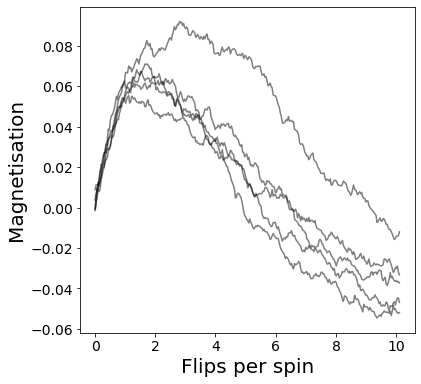

In [4]:
fig,ax=plt.subplots(figsize=(6,6))

for chain_index in range(num_cols-1) :
    flips_per_spin=[ k/len(graph) for k in data['timestep'].to_list()]
    plt.plot(flips_per_spin,data[f'chain_{chain_index}'].to_list(),'k',alpha=0.5)
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(f"Plots/spin_burn_in_{init_type}_beta_{beta_f}_g_{gradient}".replace('.','-'))